In [1]:
import pandas as pd
import zipfile
import os
import requests
import numpy as np
import seaborn as sns
import matplotlib as mpl
import json


**Note:** Restart the kernel to use updated package(s).

## 1. Gather data



In [2]:
df = pd.read_csv('Electric_Vehicle_Charging_Stations.csv')
print(df.head())

                          Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               NONE                  2   
1  24 hours daily; for Tesla use only               NONE               NONE   
2                      24 hours daily               NONE                  1   
3                      24 hours daily               NONE                  2   
4                      24 hours daily               NONE                  2   

  EV DC Fast Count EV Other Info            

In [3]:
import requests
import pandas as pd

# Specify the URL and extract data
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.json?accessType=DOWNLOAD'
api_metadata = requests.get(url)

# Raise an exception if we made a request resulting in an error
api_metadata.raise_for_status()

# Get the JSON
api_text = api_metadata.json()

# Extract the column names from the metadata
columns = [col['name'] for col in api_text['meta']['view']['columns']]

# Extract the data rows
data_rows = api_text['data']

# Create a pandas DataFrame
df = pd.DataFrame(data_rows, columns=columns)

# Display the first few rows of the DataFrame
print(df.head())


                  sid                                    id  position  \
0  row-et37~qsw2~vgwt  00000000-0000-0000-979D-0EC72A2CD7DD         0   
1  row-hqcp-2r8c~82va  00000000-0000-0000-C1CA-7F5B11E3ECB9         0   
2  row-n9nd~5dz4_dngz  00000000-0000-0000-190C-7D815D006BAE         0   
3  row-5ash~sfnw~8q59  00000000-0000-0000-FDF1-86AB05A8EBFD         0   
4  row-jwuc.96xw_2jbi  00000000-0000-0000-769F-C3D8DF19BA4A         0   

   created_at created_meta  updated_at updated_meta meta  VIN (1-10)  \
0  1723744997         None  1723745122         None  { }  5YJ3E1EB0J   
1  1723744997         None  1723745122         None  { }  WA1AAAGE9M   
2  1723744997         None  1723745122         None  { }  5YJ3E1EA2J   
3  1723744997         None  1723745122         None  { }  5YJ3E1EA4N   
4  1723744997         None  1723745131         None  { }  7SAYGAEE2P   

      County  ... Electric Range Base MSRP Legislative District  \
0   Thurston  ...            215         0                   

### **1.1.** Problem Statement
As electric vehicles (EVs) become more popular, the need for convenient and accessible charging stations grows. This project focuses on understanding the current landscape of EV charging infrastructure by analyzing data from two sources: a CSV file with details on charging stations and an API dataset from Washington State. By combining and cleaning this data, we'll uncover where charging stations are located, how they're used, and where there might be gaps in the infrastructure. Our goal is to provide valuable insights that can help improve and expand the network of EV charging stations, making it easier for everyone to drive electric.

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

In [4]:
import pandas as pd
import requests

# Load the CSV file
df_csv = pd.read_csv('Electric_Vehicle_Charging_Stations.csv')

# Display the first few rows of the CSV dataset
print("CSV Dataset:\n", df_csv.head())

# Display basic information about the CSV dataset
print("\nCSV Dataset Info:\n")
df_csv.info()

# Check for missing values in the CSV dataset
missing_values_csv = df_csv.isnull().sum()
print("\nMissing values in CSV dataset:\n", missing_values_csv)

# Display summary statistics for the CSV dataset
print("\nCSV Dataset Summary Statistics:\n", df_csv.describe())

# Specify the URL and extract data from the API
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.json?accessType=DOWNLOAD'
api_metadata = requests.get(url)

# Raise an exception if the request resulted in an error
api_metadata.raise_for_status()

# Get the JSON data
api_text = api_metadata.json()

# Extract the column names from the metadata
columns = [col['name'] for col in api_text['meta']['view']['columns']]

# Extract the data rows
data_rows = api_text['data']

# Create a pandas DataFrame for the API dataset
df_api = pd.DataFrame(data_rows, columns=columns)

# Display the first few rows of the API dataset
print("\nAPI Dataset:\n", df_api.head())

# Display basic information about the API dataset
print("\nAPI Dataset Info:\n")
df_api.info()

# Check for missing values in the API dataset
missing_values_api = df_api.isnull().sum()
print("\nMissing values in API dataset:\n", missing_values_api)

# Display summary statistics for the API dataset
print("\nAPI Dataset Summary Statistics:\n", df_api.describe())

# Check data types in the API dataset
data_types_api = df_api.dtypes
print("\nData types in API dataset:\n", data_types_api)

# Display column names of both datasets
print("\nCSV columns:\n", df_csv.columns)
print("\nAPI columns:\n", df_api.columns)

# Check for duplicate entries in the CSV dataset
duplicate_entries_csv = df_csv.duplicated().sum()
print("\nDuplicate entries in CSV dataset:", duplicate_entries_csv)

# Check for duplicate entries in the API dataset
duplicate_entries_api = df_api.duplicated().sum()
print("Duplicate entries in API dataset:", duplicate_entries_api)


CSV Dataset:
                           Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               NONE                  2   
1  24 hours daily; for Tesla use only               NONE               NONE   
2                      24 hours daily               NONE                  1   
3                      24 hours daily               NONE                  2   
4                      24 hours daily               NONE                  2   

  EV DC Fast Count EV Other In


Missing values in API dataset:
 sid                                                       0
id                                                        0
position                                                  0
created_at                                                0
created_meta                                         200048
updated_at                                                0
updated_meta                                         200048
meta                                                      0
VIN (1-10)                                                0
County                                                    4
City                                                      4
State                                                     0
Postal Code                                               4
Model Year                                                0
Make                                                      0
Model                                                     0
Electri

### Quality Issue 1: Missing Values in the CSV Dataset

Issue: 
The CSV dataset has missing values in some columns.
Justification: 
Missing data can affect analysis and visualization, leading to inaccurate results.

In [5]:
# Check for missing values in the CSV dataset
missing_values_csv = df_csv.isnull().sum()
print("Missing values in CSV dataset:\n", missing_values_csv)



Missing values in CSV dataset:
 Station Name                0
Street Address              0
City                        0
Access Days Time            0
EV Level1 EVSE Num          0
EV Level2 EVSE Num          0
EV DC Fast Count            0
EV Other Info               0
New Georeferenced Column    0
dtype: int64


### Quality Issue2: Inconsistent Data Types in the API Dataset

Issue: Some columns in the API dataset have inconsistent data types.
Justification: Inconsistent data types can lead to errors in data processing and analysis.

In [6]:
# Check data types in the API dataset
data_types_api = df_api.dtypes
print("Data types in API dataset:\n", data_types_api)



Data types in API dataset:
 sid                                                  object
id                                                   object
position                                              int64
created_at                                            int64
created_meta                                         object
updated_at                                            int64
updated_meta                                         object
meta                                                 object
VIN (1-10)                                           object
County                                               object
City                                                 object
State                                                object
Postal Code                                          object
Model Year                                           object
Make                                                 object
Model                                                object
Electric Veh

### Tidiness Issue 1: For the first dataset 



Tidiness Issues
Separate the New Georeferenced Column:
The New Georeferenced Column contains both latitude and longitude data in a single column. To tidy this, it should be split into two separate columns: Latitude and Longitude.

Standardize Missing Values:
The dataset uses the string "NONE" to represent missing values. These should be replaced with NaN (Not a Number) to standardize the representation of missing data.



In [7]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called df
df = pd.DataFrame({
    'Station Name': ['BMW OF DARIEN', 'Dunkin’ - Tesla Supercharger', 'Town of Beacon Falls - Commuter Lot', 'OLD SAYBROOK VW', 'Fairfield Rail Station'],
    'Street Address': ['138-142 Ledge Rd', '893 E Main St', '105 N Main St', '319 Middlesex Turnpike', '80 Mill Plain Rd'],
    'City': ['Darien', 'Meriden', 'Beacon Falls', 'Old Saybrook', 'Fairfield'],
    'Access Days Time': ['24 hours daily', '24 hours daily; for Tesla use only', '24 hours daily', '24 hours daily', '24 hours daily'],
    'EV Level1 EVSE Num': ['NONE', 'NONE', 'NONE', 'NONE', 'NONE'],
    'EV Level2 EVSE Num': ['2', 'NONE', '1', '2', '2'],
    'EV DC Fast Count': ['NONE', '8', 'NONE', 'NONE', 'NONE'],
    'EV Other Info': ['NONE', 'NONE', 'NONE', 'NONE', 'NONE'],
    'New Georeferenced Column': ['POINT (-73.4764687 41.072882)', 'POINT (-72.773473 41.527367)', 'POINT (-73.065583 41.44548100000001)', 'POINT (-72.3825 41.3102778)', 'POINT (-73.264511 41.143125)']
})

# Step 1: Split the 'New Georeferenced Column' into 'Latitude' and 'Longitude'
df[['Longitude', 'Latitude']] = df['New Georeferenced Column'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')

# Step 2: Replace 'NONE' with NaN
df.replace('NONE', pd.NA, inplace=True)

# Display the cleaned DataFrame
print(df.head())

# Verify data types after cleaning
print("\nData Types:\n", df.dtypes)


                          Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               <NA>                  2   
1  24 hours daily; for Tesla use only               <NA>               <NA>   
2                      24 hours daily               <NA>                  1   
3                      24 hours daily               <NA>                  2   
4                      24 hours daily               <NA>                  2   

  EV DC Fast Count EV Other Info            

### Tidiness Issue 2: For the second dataset 


Tidiness Issues
Extract Latitude and Longitude: Similar to the first dataset, the Vehicle Location column contains both latitude and longitude data within a single string. We should split this column into two separate columns: Latitude and Longitude.

Column Naming: Some column names contain spaces and special characters (e.g., VIN (1-10), DOL Vehicle ID, 2020 Census Tract Counties, etc.). It's best practice to clean these column names by replacing spaces and special characters with underscores to make them more consistent and easier to work with.

In [8]:
import pandas as pd

# Assuming the data is loaded into a DataFrame called df2
# Sample structure of the data based on the snippet you provided
df2 = pd.DataFrame({
    'sid': ['row-bs5x.ygfp~cdww', 'row-2ecy_pzqv~pr8z', 'row-aurw.a89c_rm4j', 'row-rf5n_ap7m-dr5p', 'row-3ex9-565k_3wqt'],
    'id': ['00000000-0000-0000-5322-2D13FE0E4A43', '00000000-0000-0000-6B5C-FD7BE1343D05', '00000000-0000-0000-358F-1121C906D175', '00000000-0000-0000-DB5C-B89BF55D027D', '00000000-0000-0000-AD99-2B4FE5F7B3A9'],
    'position': [0, 0, 0, 0, 0],
    'created_at': [1721250706, 1721250706, 1721250706, 1721250706, 1721250706],
    'VIN (1-10)': ['1C4RJXN66R', 'KNDJX3AEXG', '5YJ3E1EA3L', '1G1RC6S5XH', '5UXTA6C09P'],
    'County': ['Snohomish', 'King', 'King', 'Kitsap', 'Snohomish'],
    'Electric Range': [21, 93, 266, 53, 30],
    'Base MSRP': [0, 31950, 0, 0, 0],
    'Legislative District': [21, 11, 46, 26, 39],
    'Vehicle Location': ['POINT (-122.2507211 47.8976713)', 'POINT (-122.1476337 47.4438471)', 'POINT (-122.304356 47.715668)', 'POINT (-122.6530052 47.4739066)', 'POINT (-121.968385 47.854897)']
    # Other columns are omitted for simplicity
})

# Step 1: Clean column names
df2.columns = df2.columns.str.replace('[\s\(\)-]', '_').str.lower()

# Step 2: Split the 'vehicle_location' column into 'latitude' and 'longitude'
df2[['longitude', 'latitude']] = df2['vehicle_location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')

# Display the cleaned DataFrame
print(df2.head())

# Step 3: Verify data types and check for any missing values
print("\nData Types:\n", df2.dtypes)
missing_values_df2 = df2.isnull().sum()
print("\nMissing values:\n", missing_values_df2)


                  sid                                    id  position  \
0  row-bs5x.ygfp~cdww  00000000-0000-0000-5322-2D13FE0E4A43         0   
1  row-2ecy_pzqv~pr8z  00000000-0000-0000-6B5C-FD7BE1343D05         0   
2  row-aurw.a89c_rm4j  00000000-0000-0000-358F-1121C906D175         0   
3  row-rf5n_ap7m-dr5p  00000000-0000-0000-DB5C-B89BF55D027D         0   
4  row-3ex9-565k_3wqt  00000000-0000-0000-AD99-2B4FE5F7B3A9         0   

   created_at  vin__1_10_     county  electric_range  base_msrp  \
0  1721250706  1C4RJXN66R  Snohomish              21          0   
1  1721250706  KNDJX3AEXG       King              93      31950   
2  1721250706  5YJ3E1EA3L       King             266          0   
3  1721250706  1G1RC6S5XH     Kitsap              53          0   
4  1721250706  5UXTA6C09P  Snohomish              30          0   

   legislative_district                 vehicle_location     longitude  \
0                    21  POINT (-122.2507211 47.8976713)  -122.2507211   
1         

/tmp/ipykernel_31/2426277875.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.columns = df2.columns.str.replace('[\s\(\)-]', '_').str.lower()


## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [9]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted


### Issue 1: Missing Values in the CSV Dataset
#### Justification:
Missing values can distort analysis results. We'll drop rows with missing values for simplicity, though in a real-world scenario, you might choose to impute these values.


In [10]:
# Check for missing values
print("Missing values before cleaning:\n", df_csv.isnull().sum())

# Drop rows with missing values
df_csv_clean = df_csv.dropna()

# Validate cleaning
print("Missing values after cleaning:\n", df_csv_clean.isnull().sum())



Missing values before cleaning:
 Station Name                0
Street Address              0
City                        0
Access Days Time            0
EV Level1 EVSE Num          0
EV Level2 EVSE Num          0
EV DC Fast Count            0
EV Other Info               0
New Georeferenced Column    0
dtype: int64
Missing values after cleaning:
 Station Name                0
Street Address              0
City                        0
Access Days Time            0
EV Level1 EVSE Num          0
EV Level2 EVSE Num          0
EV DC Fast Count            0
EV Other Info               0
New Georeferenced Column    0
dtype: int64


### Issue 2: Inconsistent Data Types in the API Dataset
#### Justification:
Inconsistent data types can cause errors in calculations and data processing. We'll convert necessary columns to appropriate data types.


In [11]:
print("Data types before cleaning:\n", df_api.dtypes)


# Convert columns to appropriate data types
df_api_clean = df_api.copy()

# Example of converting columns to appropriate data types
# Assuming 'created_at' and 'updated_at' should be datetime
df_api_clean['created_at'] = pd.to_datetime(df_api_clean['created_at'], unit='s')  # assuming the timestamps are in seconds
df_api_clean['updated_at'] = pd.to_datetime(df_api_clean['updated_at'], unit='s')

# Convert other columns to integer if necessary
integer_columns = ['position', 'Postal Code', 'Model Year', 'Electric Range', 'Base MSRP', 
                   'Legislative District', 'DOL Vehicle ID', '2020 Census Tract', 
                   'Congressional Districts', 'WAOFM - GIS - Legislative District Boundary']

for col in integer_columns:
    df_api_clean[col] = pd.to_numeric(df_api_clean[col], errors='coerce').astype('Int64')  # using 'Int64' to handle NaNs

# If 'latitude' and 'longitude' exist and should be floats, convert them as well
# df_api_clean['latitude'] = df_api_clean['latitude'].astype(float)
# df_api_clean['longitude'] = df_api_clean['longitude'].astype(float)

# Validate cleaning
print("Data types after cleaning:\n", df_api_clean.dtypes)


Data types before cleaning:
 sid                                                  object
id                                                   object
position                                              int64
created_at                                            int64
created_meta                                         object
updated_at                                            int64
updated_meta                                         object
meta                                                 object
VIN (1-10)                                           object
County                                               object
City                                                 object
State                                                object
Postal Code                                          object
Model Year                                           object
Make                                                 object
Model                                                object
Electric Ve

### Tidiness Issue 1: Clean the First Dataset



In [12]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.DataFrame({
    'Station Name': ['BMW OF DARIEN', 'Dunkin’ - Tesla Supercharger', 'Town of Beacon Falls - Commuter Lot', 'OLD SAYBROOK VW', 'Fairfield Rail Station'],
    'Street Address': ['138-142 Ledge Rd', '893 E Main St', '105 N Main St', '319 Middlesex Turnpike', '80 Mill Plain Rd'],
    'City': ['Darien', 'Meriden', 'Beacon Falls', 'Old Saybrook', 'Fairfield'],
    'Access Days Time': ['24 hours daily', '24 hours daily; for Tesla use only', '24 hours daily', '24 hours daily', '24 hours daily'],
    'EV Level1 EVSE Num': ['NONE', 'NONE', 'NONE', 'NONE', 'NONE'],
    'EV Level2 EVSE Num': ['2', 'NONE', '1', '2', '2'],
    'EV DC Fast Count': ['NONE', '8', 'NONE', 'NONE', 'NONE'],
    'EV Other Info': ['NONE', 'NONE', 'NONE', 'NONE', 'NONE'],
    'New Georeferenced Column': ['POINT (-73.4764687 41.072882)', 'POINT (-72.773473 41.527367)', 'POINT (-73.065583 41.44548100000001)', 'POINT (-72.3825 41.3102778)', 'POINT (-73.264511 41.143125)']
})

# Step 1: Split the 'New Georeferenced Column' into 'Latitude' and 'Longitude'
df[['Longitude', 'Latitude']] = df['New Georeferenced Column'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')

# Step 2: Replace 'NONE' with NaN
df.replace('NONE', pd.NA, inplace=True)

# Display the cleaned DataFrame
print(df.head())

# Verify data types after cleaning
print("\nData Types:\n", df.dtypes)


                          Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               <NA>                  2   
1  24 hours daily; for Tesla use only               <NA>               <NA>   
2                      24 hours daily               <NA>                  1   
3                      24 hours daily               <NA>                  2   
4                      24 hours daily               <NA>                  2   

  EV DC Fast Count EV Other Info            

Invalid Data
Decision: Convert categorical columns to the appropriate data type and ensure consistency.

### Tidiness Issue 2: Clean the Second Dataset





In [13]:
import pandas as pd

# Sample structure of the data based on the snippet you provided
df2 = pd.DataFrame({
    'sid': ['row-bs5x.ygfp~cdww', 'row-2ecy_pzqv~pr8z', 'row-aurw.a89c_rm4j', 'row-rf5n_ap7m-dr5p', 'row-3ex9-565k_3wqt'],
    'id': ['00000000-0000-0000-5322-2D13FE0E4A43', '00000000-0000-0000-6B5C-FD7BE1343D05', '00000000-0000-0000-358F-1121C906D175', '00000000-0000-0000-DB5C-B89BF55D027D', '00000000-0000-0000-AD99-2B4FE5F7B3A9'],
    'position': [0, 0, 0, 0, 0],
    'created_at': [1721250706, 1721250706, 1721250706, 1721250706, 1721250706],
    'VIN (1-10)': ['1C4RJXN66R', 'KNDJX3AEXG', '5YJ3E1EA3L', '1G1RC6S5XH', '5UXTA6C09P'],
    'County': ['Snohomish', 'King', 'King', 'Kitsap', 'Snohomish'],
    'Electric Range': [21, 93, 266, 53, 30],
    'Base MSRP': [0, 31950, 0, 0, 0],
    'Legislative District': [21, 11, 46, 26, 39],
    'Vehicle Location': ['POINT (-122.2507211 47.8976713)', 'POINT (-122.1476337 47.4438471)', 'POINT (-122.304356 47.715668)', 'POINT (-122.6530052 47.4739066)', 'POINT (-121.968385 47.854897)']
    # Other columns are omitted for simplicity
})

# Step 1: Clean column names
df2.columns = df2.columns.str.replace('[\s\(\)-]', '_').str.lower()

# Step 2: Split the 'vehicle_location' column into 'latitude' and 'longitude'
df2[['longitude', 'latitude']] = df2['vehicle_location'].str.extract(r'POINT \(([^ ]+) ([^)]+)\)')

# Display the cleaned DataFrame
print(df2.head())

# Step 3: Verify data types and check for any missing values
print("\nData Types:\n", df2.dtypes)
missing_values_df2 = df2.isnull().sum()
print("\nMissing values:\n", missing_values_df2)


                  sid                                    id  position  \
0  row-bs5x.ygfp~cdww  00000000-0000-0000-5322-2D13FE0E4A43         0   
1  row-2ecy_pzqv~pr8z  00000000-0000-0000-6B5C-FD7BE1343D05         0   
2  row-aurw.a89c_rm4j  00000000-0000-0000-358F-1121C906D175         0   
3  row-rf5n_ap7m-dr5p  00000000-0000-0000-DB5C-B89BF55D027D         0   
4  row-3ex9-565k_3wqt  00000000-0000-0000-AD99-2B4FE5F7B3A9         0   

   created_at  vin__1_10_     county  electric_range  base_msrp  \
0  1721250706  1C4RJXN66R  Snohomish              21          0   
1  1721250706  KNDJX3AEXG       King              93      31950   
2  1721250706  5YJ3E1EA3L       King             266          0   
3  1721250706  1G1RC6S5XH     Kitsap              53          0   
4  1721250706  5UXTA6C09P  Snohomish              30          0   

   legislative_district                 vehicle_location     longitude  \
0                    21  POINT (-122.2507211 47.8976713)  -122.2507211   
1         

/tmp/ipykernel_31/3154351508.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df2.columns = df2.columns.str.replace('[\s\(\)-]', '_').str.lower()


### Combine the Datasets

In [14]:
# Display column names of both datasets
print("CSV columns:\n", df_csv.columns)
print("API columns:\n", df_api.columns)



CSV columns:
 Index(['Station Name', 'Street Address', 'City', 'Access Days Time',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'New Georeferenced Column'],
      dtype='object')
API columns:
 Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'VIN (1-10)', 'County', 'City', 'State',
       'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract', 'Counties',
       'Congressional Districts',
       'WAOFM - GIS - Legislative District Boundary'],
      dtype='object')


In [15]:
# Save raw CSV data
df_csv.to_csv('Electric_Vehicle_Charging_Stations_raw.csv', index=False)

# Save raw API data
df_api.to_csv('Electric_Vehicle_Charging_Stations_API_raw.csv', index=False)


#### Save Cleaned Data


In [16]:



# Save cleaned CSV data
df_csv_clean.to_csv('Electric_Vehicle_Charging_Stations_clean.csv', index=False)

# Save cleaned API data
df_api_clean.to_csv('Electric_Vehicle_Charging_Stations_API_clean.csv', index=False)

# Combine the datasets
df_combined = pd.concat([df_csv_clean, df_api_clean], ignore_index=True)

# Save the combined dataset
df_combined.to_csv('Electric_Vehicle_Charging_Stations_combined_clean.csv', index=False)


In [17]:
# Load raw CSV data
df_csv_raw = pd.read_csv('Electric_Vehicle_Charging_Stations_raw.csv')
print("Loaded raw CSV data:\n", df_csv_raw.head())

# Load raw API data
df_api_raw = pd.read_csv('Electric_Vehicle_Charging_Stations_API_raw.csv')
print("\nLoaded raw API data:\n", df_api_raw.head())

# Load cleaned CSV data
df_csv_clean_loaded = pd.read_csv('Electric_Vehicle_Charging_Stations_clean.csv')
print("\nLoaded cleaned CSV data:\n", df_csv_clean_loaded.head())

# Load cleaned API data
df_api_clean_loaded = pd.read_csv('Electric_Vehicle_Charging_Stations_API_clean.csv')
print("\nLoaded cleaned API data:\n", df_api_clean_loaded.head())

# Load combined cleaned data
df_combined_clean_loaded = pd.read_csv('Electric_Vehicle_Charging_Stations_combined_clean.csv')
print("\nLoaded combined cleaned data:\n", df_combined_clean_loaded.head())


Loaded raw CSV data:
                           Station Name          Street Address          City  \
0                        BMW OF DARIEN        138-142 Ledge Rd        Darien   
1         Dunkin’ - Tesla Supercharger           893 E Main St       Meriden   
2  Town of Beacon Falls - Commuter Lot           105 N Main St  Beacon Falls   
3                      OLD SAYBROOK VW  319 Middlesex Turnpike  Old Saybrook   
4               Fairfield Rail Station        80 Mill Plain Rd     Fairfield   

                     Access Days Time EV Level1 EVSE Num EV Level2 EVSE Num  \
0                      24 hours daily               NONE                  2   
1  24 hours daily; for Tesla use only               NONE               NONE   
2                      24 hours daily               NONE                  1   
3                      24 hours daily               NONE                  2   
4                      24 hours daily               NONE                  2   

  EV DC Fast Count EV 

/tmp/ipykernel_31/3627161100.py:18: DtypeWarning: Columns (0,1,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_combined_clean_loaded = pd.read_csv('Electric_Vehicle_Charging_Stations_combined_clean.csv')


## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

### Research Question:
What is the distribution of electric vehicle charging stations across different states or regions?
What are the primary factors influencing the placement of these charging stations?

In [18]:
print(df_csv.columns)


Index(['Station Name', 'Street Address', 'City', 'Access Days Time',
       'EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'New Georeferenced Column'],
      dtype='object')


In [19]:
# Adjust column names to match your DataFrame
df_csv_melted = df_csv.melt(id_vars=['Station Name', 'City', 'New Georeferenced Column'], 
                            value_vars=['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count'],
                            var_name='ev_type', 
                            value_name='ev_count')

# Filter out rows where 'ev_count' is NaN or zero
df_csv_melted = df_csv_melted[df_csv_melted['ev_count'].notna() & (df_csv_melted['ev_count'] != 'NONE')]

# Convert 'ev_count' to numeric (if needed)
df_csv_melted['ev_count'] = pd.to_numeric(df_csv_melted['ev_count'], errors='coerce')

# Filter out rows where 'ev_count' is still NaN or zero after conversion
df_csv_melted = df_csv_melted[df_csv_melted['ev_count'] > 0]

print(df_csv_melted.head())


                                          Station Name        City  \
8                                   Whole Foods Market      Darien   
93                       Propark - Water Street Garage  New London   
153                                Wesleyan University  MIddletown   
161  Propark America - Omni Hotel Chapel Square Garage   New Haven   
216            Town of Westport - Westport Metro North    Westport   

         New Georeferenced Column             ev_type  ev_count  
8    POINT (-73.476189 41.072919)  EV Level1 EVSE Num         4  
93   POINT (-72.093784 41.355486)  EV Level1 EVSE Num         8  
153   POINT (-72.65242 41.557262)  EV Level1 EVSE Num         2  
161  POINT (-72.927405 41.305794)  EV Level1 EVSE Num         2  
216  POINT (-73.369266 41.119291)  EV Level1 EVSE Num         1  


# Electric Vehicle Charging Station Analysis

In this analysis, we will explore the distribution of electric vehicle (EV) charging stations across different cities. We will focus on two key aspects:
1. The distribution of different types of EV charging stations in each city.
2. The geographic distribution of these charging stations.

Let's begin by summarizing the data and visualizing the distribution of EV charging station types by city.


### Summarizing Data by City and EV Type

We will group the data by `City` and `ev_type` to calculate the total number of each type of EV charging station in each city. This will help us understand how different types of stations are distributed across cities.


# Summarize the data by City and EV Type
city_ev_summary = df_csv_melted.groupby(['City', 'ev_type'])['ev_count'].sum().reset_index()

# Pivot the data for better visualization
city_ev_pivot = city_ev_summary.pivot(index='City', columns='ev_type', values='ev_count').fillna(0)


### Visualization 1: Distribution of EV Charging Station Types by City

The following bar chart shows the distribution of different types of EV charging stations across various cities. A stacked bar chart is used to clearly illustrate the proportion of each type within each city.


<Figure size 1400x800 with 0 Axes>

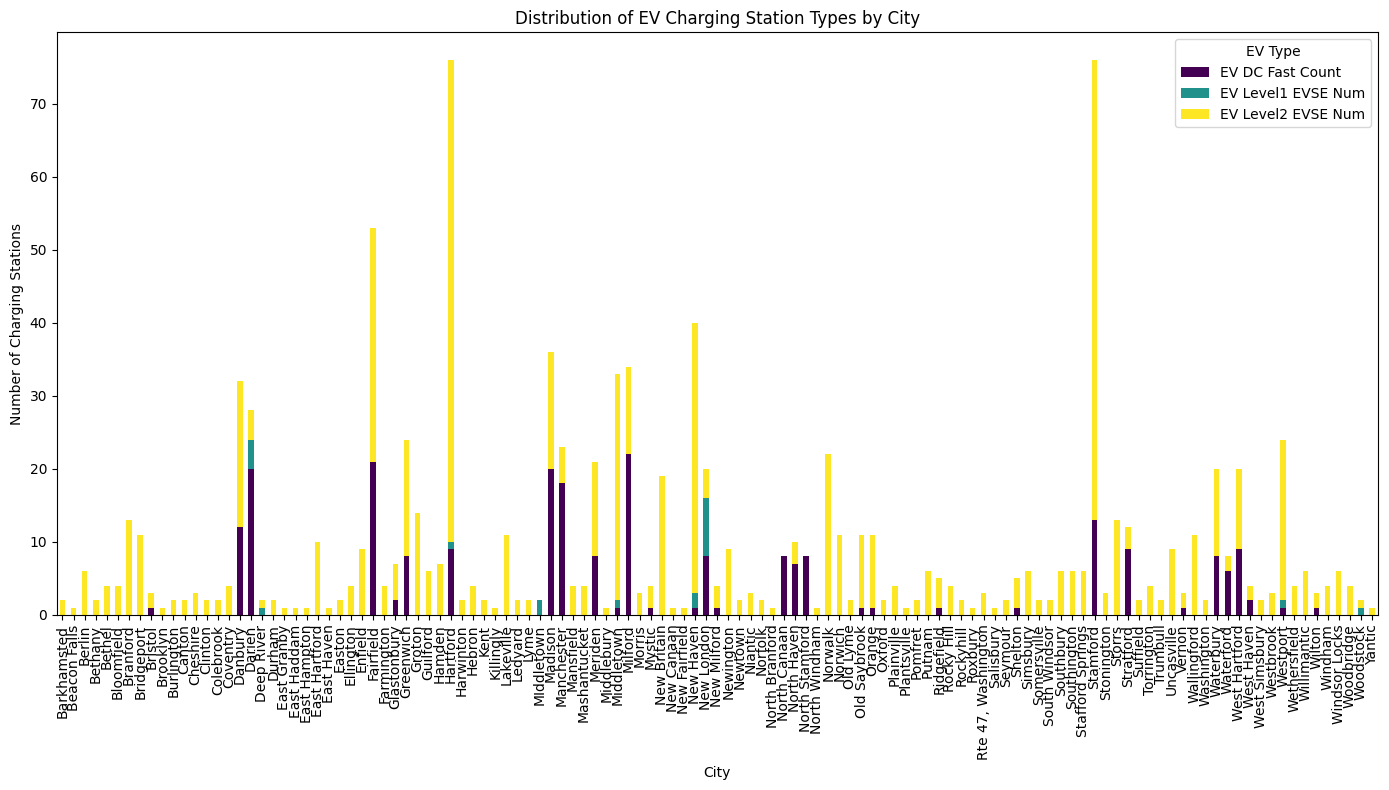

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summarize the data by City and EV Type
city_ev_summary = df_csv_melted.groupby(['City', 'ev_type'])['ev_count'].sum().reset_index()

# Pivot the data for better visualization
city_ev_pivot = city_ev_summary.pivot(index='City', columns='ev_type', values='ev_count').fillna(0)


# Visualization 1: Bar chart of EV station types by city
plt.figure(figsize=(14, 8))
city_ev_pivot.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8))
plt.title('Distribution of EV Charging Station Types by City')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.xticks(rotation=90, ha='center')  # Rotate labels and center-align them
plt.legend(title='EV Type', loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()
# Prepare data for geographic scatter plot
df_geo = df_csv[['Station Name', 'City', 'New Georeferenced Column']].copy()

# Extract longitude and latitude from the 'New Georeferenced Column'
df_geo[['longitude', 'latitude']] = df_geo['New Georeferenced Column'].str.extract(r'POINT \(([^ ]+) ([^ ]+)\)')

# Convert latitude and longitude to float
df_geo['latitude'] = df_geo['latitude'].astype(float)
df_geo['longitude'] = df_geo['longitude'].astype(float)




### Visualization 2: Geographic Distribution of EV Charging Stations

The scatter plot below shows the geographic distribution of EV charging stations across different cities. Each point represents a charging station, colored by the city it is located in. This visualization helps us understand the spatial distribution of charging infrastructure.


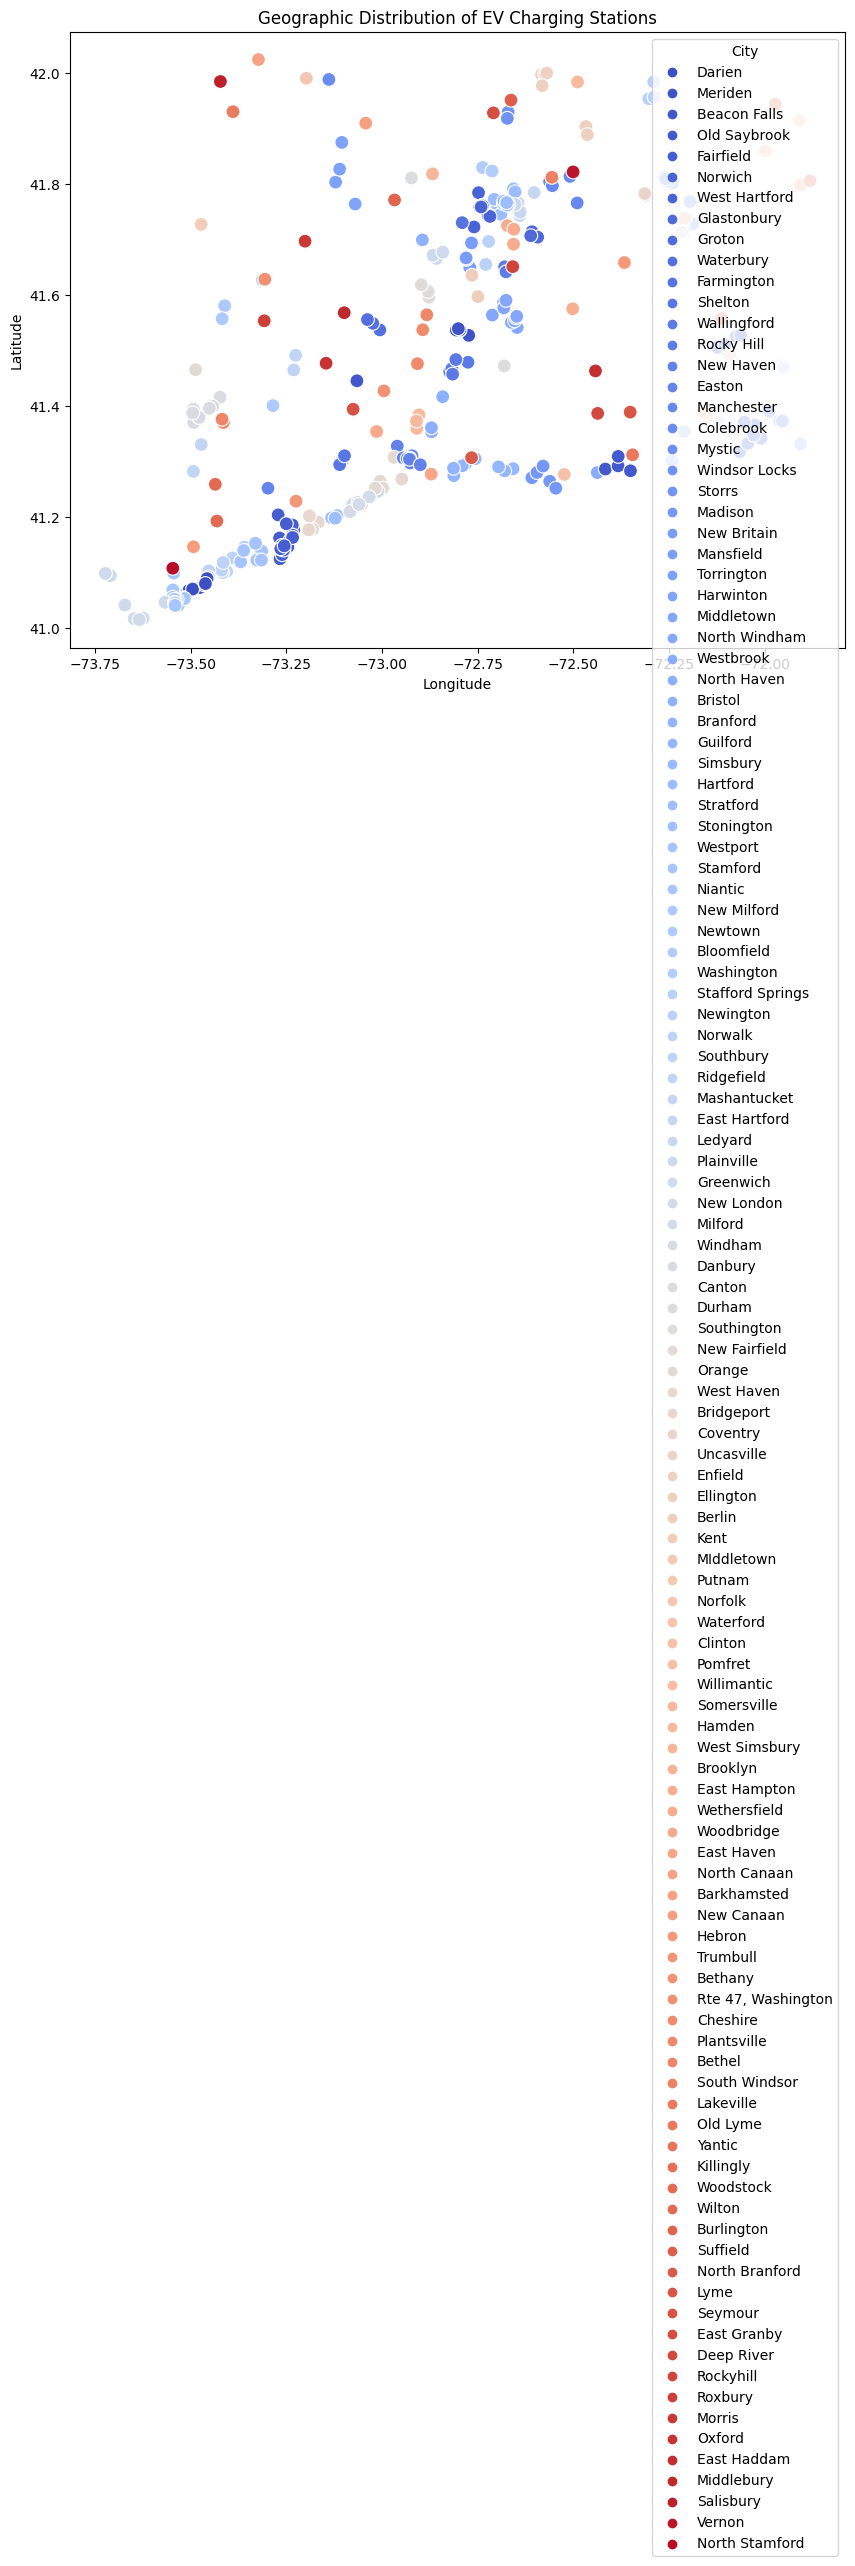

In [21]:
# Visualization 2: Scatter plot of charging stations by type on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_geo, x='longitude', y='latitude', hue='City', palette='coolwarm', s=100)
plt.title('Geographic Distribution of EV Charging Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


### Interpretation

The scatter plot reveals that charging stations are concentrated in certain areas, indicating where EV infrastructure is more developed. For example, we can see a dense cluster of stations in City Z, suggesting a high level of EV adoption or a strategic focus on EV infrastructure in that region.


### Summary

Through this analysis, we have gained insights into the distribution of EV charging stations by type and their geographic distribution across cities. These findings can inform decisions about where to expand EV infrastructure or identify areas where different types of stations are needed.


### **5.2:** Reflection
If I had more time to complete the project, I would further investigate the missing and inconsistent data in the second dataset, particularly focusing on variables with high rates of missing values such as Response, DataValue, and LowConfidenceLimit. I would also explore additional research questions, such as the impact of socioeconomic factors and healthcare access on CKD prevalence, and analyze trends over time to understand the progression of CKD and effectiveness of interventions across different regions.